# Timeseries Analysis

1) Plotting a time series <br>
2) Plotting 2 time series <br>
3) Correlation between 2 time series <br>
4) Mean Reversion <br>
5) Autocorrelation - Mean Reversion or Trending relation <br>

In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

### Plotting a time series

                 Close
Date                  
2010-01-04  113.330002
2010-01-05  113.629997
2010-01-06  113.709999
2010-01-07  114.190002
2010-01-08  114.570000


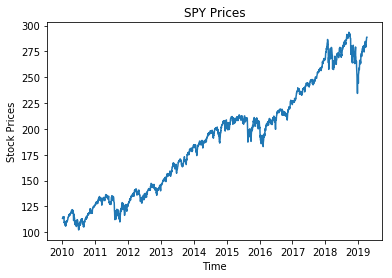

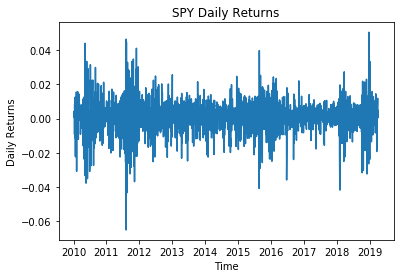

In [13]:
def data_clean(name):
    file_name="data/"+name+".csv"
    data=pd.read_csv(file_name)[['Date','Close']]
    data.index=pd.to_datetime(data['Date'])
    del data['Date']
    return data

spy=data_clean("SPY")
print(spy.head(5))

plt.plot(spy['Close'])
plt.title('SPY Prices')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.show()

spy_returns=spy.pct_change()
plt.plot(spy_returns)
plt.title('SPY Daily Returns')
plt.xlabel('Time')
plt.ylabel('Daily Returns')
plt.show()


### PLotting 2 time series together

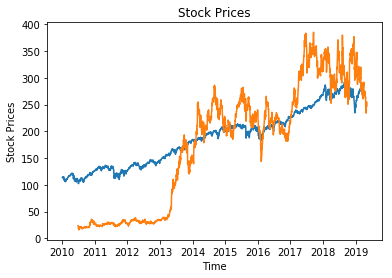

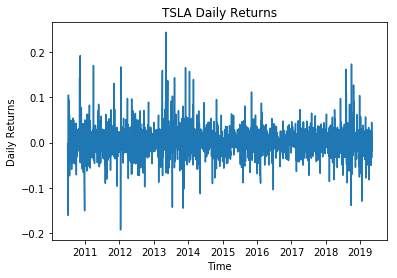

In [18]:
tsla=data_clean("TSLA")
tsla_returns=tsla.pct_change()


plt.plot(spy['Close'])
plt.plot(tsla['Close'])
plt.title('Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.show()

plt.plot(tsla_returns)
plt.title('TSLA Daily Returns')
plt.xlabel('Time')
plt.ylabel('Daily Returns')
plt.show()

### Correlation between 2 stocks

In [29]:
print("Correlation between stocks")
print(tsla['Close'].corr(spy['Close']))
print("Correlation between prices of two stocks will always be high. To find the correct correlation we need to find relation between stock returns")


print("Correlation between stock returns")
print(tsla_returns['Close'].corr(spy_returns['Close']))

print("The +ve correlation tells that both SPY and TSLA move in same direction, a correlation of 0.35 is not that high. A -ve correlation would have told us that 2 assets move in opposite direction")

Correlation between stocks
0.9432631536781562
Correlation between prices of two stocks will always be high. To find the correct correlation we need to find relation between stock returns
Correlation between stock returns
0.35866609839304164
The +ve correlation tells that both SPY and TSLA move in same direction, a correlation of 0.35 is not that high. A -ve correlation would have told us that 2 assets move in opposite direction


### Mean reversion strategy over different time intervals

The correlation between 2 prices(A & B) change from time to time. Lets say that on <br>
Day T the correlation is : 0.85 over a daily horizon <br>
On Day (T+2) Company A announces it's bad quartely results the price tanks and the correlation is now 0.34. A smart investor would know that Stock A is temporarily down. He would study such past intances when the correlation between 2 stocks deviated from it's normal and how quickly the Correlation recovered, thus he will buy A or can also sell B considering that the sector is performing bad thus hoping to see same correlation.<br>
The study needs to be done on different number of time horizon of 1 Day to an (365 days) an Year to have a full understanding of the behavior of assets

### Auto-Correlation of time series with itself

An auto correlation of a stock price with itself will tell us about a stock nature. <br>
1) -ve Auto Correlation suggests a Mean Reversion behavior <br>
2) +ve Auto Correlation suggests a trending behavior of time series <br> 

Let's analyze TSLA behavior, I believe that it will be -ve auto correlation, let's check my belief on a time scale of 1 day to 1 Year